之前介绍过的优化算法中，目标函数自变量的每一个元素在相同时间步都使用同一个学习率来自我迭代。

AdaGrad算法，它根据自变量在每个维度的梯度值的大小来调整各个维度上的学习率，从而避免统一的学习率难以适应所有维度的问题

first:  
AdaGrad算法会使用一个小批量随机梯度g(t)​按元素平方的累加变量s(t)。  
在时间步0，AdaGrad将s0​中每个元素初始化为0。  
在时间步t，首先将小批量随机梯度gt​按元素平方后累加到变量s(t)​： 
   
s(t) <- s(t-1) + g(t) (*) g(t)

second:  
接着，我们将目标函数自变量中每个元素的学习率通过按元素运算重新调整一下   
  
x(t) <- x(t-1) - n/(s(t)+e)^0.5 (*) g(t)

n是学习率，e是为了维持数值稳定性而添加的常数，如10−6。  
这里开方、除法和乘法的运算都是按元素运算的  
这些按元素运算使得目标函数自变量中每个元素都分别拥有自己的学习率。

# 特点

小批量随机梯度按元素平方的累加变量s(t)​出现在学习率的分母项中。  
* 如果目标函数有关自变量中某个元素的偏导数一直都较大，那么该元素的学习率将下降较快
* 如果目标函数有关自变量中某个元素的偏导数一直都较小，那么该元素的学习率将下降较慢。

然而，由于st一直在累加按元素平方的梯度，自变量中每个元素的学习率在迭代过程中一直在降低（或不变）  
所以，__当学习率在迭代早期降得较快且当前解依然不佳时，AdaGrad算法在迭代后期由于学习率过小，可能较难找到一个有用的解。__

epoch 20,x1: -2.382562771979649 x2: -0.15859055003666966


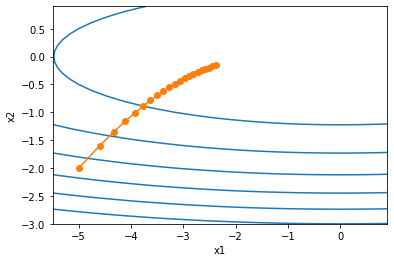

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
import math

eta = 0.4


def adagrad2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f2d(x1, x2):  # 目标函数
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def train2D(trainer):
    x1,x2,s1,s2=-5,-2,0,0
    result=[(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        result.append((x1,x2))
    print('epoch 20,x1:',x1,'x2:',x2)
    return result

def showTrace2D(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

showTrace2D(f2d, train2D(adagrad2d))

# 简洁实现

```torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)```